In [1]:
import json
from paperqa import Settings, ask
import os
from paperqa import Settings

from paperqa.agents.search import get_directory_index




In [2]:
import os
#print current working directory
print("Current working directory:", os.getcwd())
#change to the directory where the source located
os.chdir("../data")
print("Current working directory:", os.getcwd())

Current working directory: /Users/apple/Documents/GitLab_Projects/master_project/xx823/notebooks
Current working directory: /Users/apple/Documents/GitLab_Projects/master_project/xx823/data


In [3]:
# Load the questions
with open("Questions/formatted_questions/questions.json", "r") as f:
    questions = json.load(f)

# Search for this specific question
target_question = "What effect does bone marrow stromal cell-conditioned media have on the expression of the CD8a receptor in cultured OT-1 T cells?"
matching_questions = [q for q in questions if q["question"] == target_question]

if matching_questions:
    print("Found the question!")
    question_data = matching_questions[0]
else:
    print("Question not found in dataset")

Found the question!


In [4]:
question_data

{'question': 'What effect does bone marrow stromal cell-conditioned media have on the expression of the CD8a receptor in cultured OT-1 T cells?',
 'choices': ['(A) No effect',
  '(B) Insufficient information to answer the question',
  '(C) Decrease',
  '(D) Increase'],
 'correct_answer': 'A',
 'unsure_option': 'B',
 'sources': ['https://doi.org/10.1101/2024.01.31.578101'],
 'ideal': 'No effect',
 'distractors': ['Increase', 'Decrease']}

In [5]:
def format_multiple_choice_question(question, choices):
    formatted = f"Question:Q: {question}; Options: "
    formatted += " ".join(choices)
    return formatted


In [6]:
# Set up PaperQA2 with the paper directory
settings = Settings(
    temperature=0.0,  # Keep deterministic
    paper_directory="paper-2a"  # Directory containing the paper with DOI: 10.1101/2024.01.31.578101
)


In [7]:
formatted_q = format_multiple_choice_question(question_data['question'], question_data['choices'])
formatted_q

'Question:Q: What effect does bone marrow stromal cell-conditioned media have on the expression of the CD8a receptor in cultured OT-1 T cells?; Options: (A) No effect (B) Insufficient information to answer the question (C) Decrease (D) Increase'

In [8]:
import nest_asyncio
nest_asyncio.apply()

In [9]:
# Create settings with explicit configuration
settings = Settings(
    paper_directory='paper-2a',
    agent={"index": {
        "sync_with_paper_directory": True,
        "recurse_subdirectories": True
    }}
)



In [10]:

built_index = await get_directory_index(settings=settings)

# Print index information 
print(f"Using index: {settings.get_index_name()}")
index_files = await built_index.index_files
print(f"Number of indexed files: {len(index_files)}")
print("Indexed files:")
for file in index_files:
    print(f"- {file}")

SEMANTIC_SCHOLAR_API_KEY environment variable not set. Semantic Scholar API rate limits may apply.
CROSSREF_MAILTO environment variable not set. Crossref API rate limits may apply.
CROSSREF_API_KEY environment variable not set. Crossref API rate limits may apply.
SEMANTIC_SCHOLAR_API_KEY environment variable not set. Semantic Scholar API rate limits may apply.


Using index: pqa_index_cbff7fcfd4c40d16300be97065eb8f7c
Number of indexed files: 2
Indexed files:
- The T-cell niche tunes immune function through modulation of the cytoskeleton and TCRantigen forces.pdf
- darby-et-al-2024-differential-development-of-antibiotic-resistance-and-virulence-between-acinetobacter-species.pdf


In [11]:
import nest_asyncio
nest_asyncio.apply()

In [12]:
from paperqa.settings import Settings, AgentSettings

settings = Settings(
    llm="gpt-4o-mini",
    llm_config={
        "model_list": [
            {
                "model_name": "gpt-4o-mini",
                "litellm_params": {
                    "model": "gpt-4o-mini",
                    "temperature": 0.1,
                    "max_tokens": 4096,
                },
            }
        ],
        "rate_limit": {
            "gpt-4o-mini": "30000 per 1 minute",
        },
    },
    summary_llm="gpt-4o-mini",
    summary_llm_config={
        "rate_limit": {
            "gpt-4o-mini": "30000 per 1 minute",
        },
    },
    agent=AgentSettings(
        agent_llm="gpt-4o-mini",
        agent_llm_config={
            "rate_limit": {
                "gpt-4o-mini": "30000 per 1 minute",
            },
        }
    ),
    embedding="text-embedding-3-small",
    temperature=0.5,  # Keep deterministic
    paper_directory='paper-2a' # Directory containing the paper with DOI: 10.1101/2024.01.31.578101

)

In [21]:
answer_pqa = await ask(formatted_q, settings=settings)

[13:22:13] Starting paper search for 'bone marrow stromal cell-conditioned media CD8a receptor OT-1 T cells'.

           paper_search for query 'bone marrow stromal cell-conditioned media CD8a receptor OT-1 T cells' and      
           offset 0 returned 2 papers.

           Status: Paper Count=2 | Relevant Papers=0 | Current Evidence=0 | Current Cost=$0.0001

[13:22:14] gather_evidence starting for question 'What effect does bone marrow stromal cell-conditioned media have 
           on the expression of the CD8a receptor in cultured OT-1 T cells?'.

[13:22:22] Status: Paper Count=2 | Relevant Papers=1 | Current Evidence=5 | Current Cost=$0.0035

[13:22:24] gather_evidence starting for question 'What effect does bone marrow stromal cell-conditioned media have 
           on the expression of the CD8a receptor in cultured OT-1 T cells?'.

[13:23:17] Status: Paper Count=2 | Relevant Papers=1 | Current Evidence=10 | Current Cost=$0.0070

           gather_evidence starting for question 'OT-1 T cells CD8a expression stromal cell-conditioned medium'.

[13:23:29] Status: Paper Count=2 | Relevant Papers=1 | Current Evidence=19 | Current Cost=$0.0103

[13:23:31] Generating answer for 'Question:Q: What effect does bone marrow stromal cell-conditioned media have on  
           the expression of the CD8a receptor in cultured OT-1 T cells?; Options: (A) No effect (B) Insufficient  
           information to answer the question (C) Decrease (D) Increase'.

[13:23:36] Status: Paper Count=2 | Relevant Papers=1 | Current Evidence=19 | Current Cost=$0.0110

[13:23:37] Completing 'Question:Q: What effect does bone marrow stromal cell-conditioned media have on the         
           expression of the CD8a receptor in cultured OT-1 T cells?; Options: (A) No effect (B) Insufficient      
           information to answer the question (C) Decrease (D) Increase' as 'certain'.

           Answer: Bone marrow stromal cell-conditioned media (SCM) does not significantly affect the expression of
           the CD8α receptor in cultured OT-1 T cells. The study found that the geometric mean fluorescence        
           intensity (MFI) of CD8α expression in OT-1 T cells cultured in SCM was not statistically different from 
           those cultured in unconditioned medium (UCM) or adipocyte-conditioned medium (ACM)                      
           (kellner2024thetcellniche pages 3-5). Specifically, after 24 hours of culture, T cells did not exhibit  
           significant alterations in the surface expression of the T cell receptor (TCR) or the CD8α co-receptor, 
           indicating that SCM does not positively or negatively influence CD8α expression in this context         
           (kellner2024thetcellniche pages 5-6).                                                                   
                                                                                                                   
           While there was a trend towards increased surface expression of CD8α in T cells cultured in ACM, the    
           overall impact of SCM on CD8α receptor expression remains inconclusive based on the examined data       
           (kellner2024thetcellniche pages 5-6). Therefore, the most accurate answer to the question is (A) No     
           effect, as the evidence suggests that SCM does not alter CD8α expression levels in OT-1 T cells.

In [22]:
print("Answer:", answer_pqa)

Answer: session=PQASession(id=UUID('875f7e51-92ed-4934-acdb-2e630a17b5df'), question='Question:Q: What effect does bone marrow stromal cell-conditioned media have on the expression of the CD8a receptor in cultured OT-1 T cells?; Options: (A) No effect (B) Insufficient information to answer the question (C) Decrease (D) Increase', answer='Bone marrow stromal cell-conditioned media (SCM) does not significantly affect the expression of the CD8α receptor in cultured OT-1 T cells. The study found that the geometric mean fluorescence intensity (MFI) of CD8α expression in OT-1 T cells cultured in SCM was not statistically different from those cultured in unconditioned medium (UCM) or adipocyte-conditioned medium (ACM) (kellner2024thetcellniche pages 3-5). Specifically, after 24 hours of culture, T cells did not exhibit significant alterations in the surface expression of the T cell receptor (TCR) or the CD8α co-receptor, indicating that SCM does not positively or negatively influence CD8α exp

In [23]:
# Assuming `response` is the object you want to inspect
attributes = [attr for attr in dir(answer_pqa) if not attr.startswith('_')]
print(attributes)

['bibtex', 'construct', 'copy', 'dict', 'duration', 'from_orm', 'get_summary', 'json', 'model_computed_fields', 'model_config', 'model_construct', 'model_copy', 'model_dump', 'model_dump_json', 'model_extra', 'model_fields', 'model_fields_set', 'model_json_schema', 'model_parametrized_name', 'model_post_init', 'model_rebuild', 'model_validate', 'model_validate_json', 'model_validate_strings', 'parse_file', 'parse_obj', 'parse_raw', 'schema', 'schema_json', 'session', 'stats', 'status', 'strip_answer', 'timing_info', 'update_forward_refs', 'validate']


In [24]:
answer_pqa.model_dump()['session']['answer']

'Bone marrow stromal cell-conditioned media (SCM) does not significantly affect the expression of the CD8α receptor in cultured OT-1 T cells. The study found that the geometric mean fluorescence intensity (MFI) of CD8α expression in OT-1 T cells cultured in SCM was not statistically different from those cultured in unconditioned medium (UCM) or adipocyte-conditioned medium (ACM) (kellner2024thetcellniche pages 3-5). Specifically, after 24 hours of culture, T cells did not exhibit significant alterations in the surface expression of the T cell receptor (TCR) or the CD8α co-receptor, indicating that SCM does not positively or negatively influence CD8α expression in this context (kellner2024thetcellniche pages 5-6). \n\nWhile there was a trend towards increased surface expression of CD8α in T cells cultured in ACM, the overall impact of SCM on CD8α receptor expression remains inconclusive based on the examined data (kellner2024thetcellniche pages 5-6). Therefore, the most accurate answer 

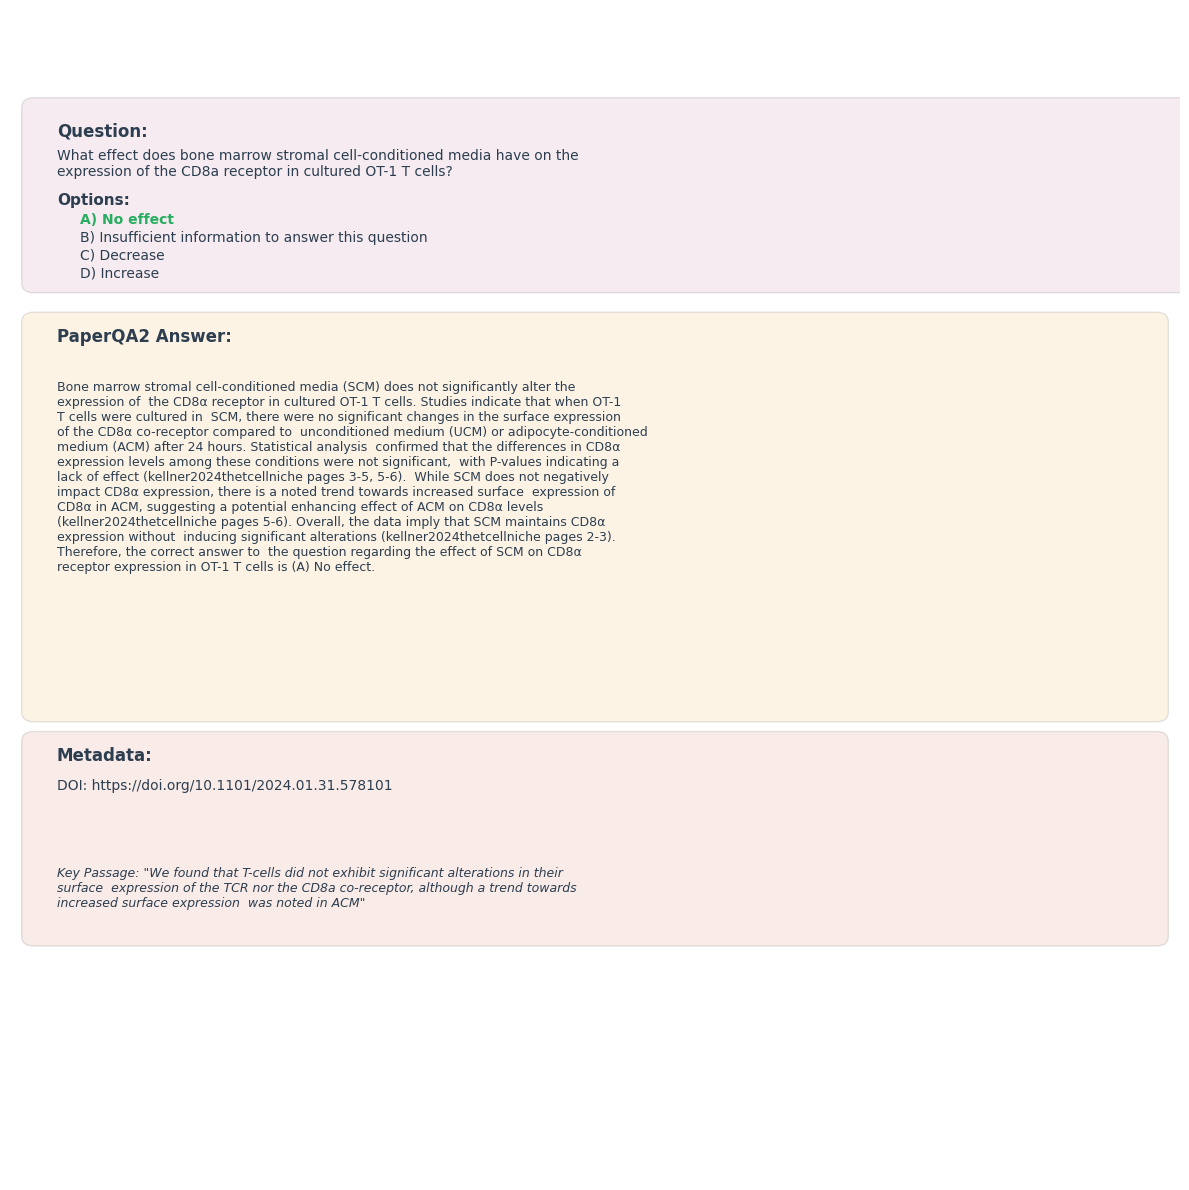

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import textwrap

# Set up the figure with more height
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_xlim(0, 10)
ax.set_ylim(0, 12)
ax.axis('off')

# Define colors
header_color = '#2E86AB'
question_bg = '#A23B72'
answer_bg = '#F18F01'
metadata_bg = '#C73E1D'
text_color = '#2C3E50'

# Title
# ax.text(5, 11.5, 'Example LitQA2 Question and PaperQA2 Response', 
#         fontsize=16, fontweight='bold', ha='center', color=text_color)

# Question section
question_box = FancyBboxPatch((0.2, 9.2), 10.0, 1.8, 
                              boxstyle="round,pad=0.1", 
                              facecolor=question_bg, 
                              edgecolor='black', 
                              alpha=0.1)
ax.add_patch(question_box)

ax.text(0.4, 10.7, 'Question:', fontsize=12, fontweight='bold', color=text_color)
question_text = """What effect does bone marrow stromal cell-conditioned media have on the 
expression of the CD8a receptor in cultured OT-1 T cells?"""
wrapped_question = textwrap.fill(question_text, width=80)
ax.text(0.4, 10.3, wrapped_question, fontsize=10, color=text_color)

# Options
ax.text(0.4, 10.0, 'Options:', fontsize=11, fontweight='bold', color=text_color)
options = [
    'A) No effect',
    'B) Insufficient information to answer this question', 
    'C) Decrease',
    'D) Increase'
]
for i, option in enumerate(options):
    color = '#27AE60' if option.startswith('A)') else text_color
    weight = 'bold' if option.startswith('A)') else 'normal'
    ax.text(0.6, 9.8 - i*0.18, option, fontsize=10, color=color, fontweight=weight)

# PaperQA Answer section
answer_box = FancyBboxPatch((0.2, 4.8), 9.6, 4.0, 
                            boxstyle="round,pad=0.1", 
                            facecolor=answer_bg, 
                            edgecolor='black', 
                            alpha=0.1)
ax.add_patch(answer_box)

ax.text(0.4, 8.6, 'PaperQA2 Answer:', fontsize=12, fontweight='bold', color=text_color)

answer_text = """Bone marrow stromal cell-conditioned media (SCM) does not significantly alter the expression of 
the CD8α receptor in cultured OT-1 T cells. Studies indicate that when OT-1 T cells were cultured in 
SCM, there were no significant changes in the surface expression of the CD8α co-receptor compared to 
unconditioned medium (UCM) or adipocyte-conditioned medium (ACM) after 24 hours. Statistical analysis 
confirmed that the differences in CD8α expression levels among these conditions were not significant, 
with P-values indicating a lack of effect (kellner2024thetcellniche pages 3-5, 5-6).

While SCM does not negatively impact CD8α expression, there is a noted trend towards increased surface 
expression of CD8α in ACM, suggesting a potential enhancing effect of ACM on CD8α levels 
(kellner2024thetcellniche pages 5-6). Overall, the data imply that SCM maintains CD8α expression without 
inducing significant alterations (kellner2024thetcellniche pages 2-3). Therefore, the correct answer to 
the question regarding the effect of SCM on CD8α receptor expression in OT-1 T cells is (A) No effect."""

wrapped_answer = textwrap.fill(answer_text, width=90)
ax.text(0.4, 8.2, wrapped_answer, fontsize=9, color=text_color, va='top')

# Metadata section
metadata_box = FancyBboxPatch((0.2, 2.5), 9.6, 2.0, 
                              boxstyle="round,pad=0.1", 
                              facecolor=metadata_bg, 
                              edgecolor='black', 
                              alpha=0.1)
ax.add_patch(metadata_box)

ax.text(0.4, 4.3, 'Metadata:', fontsize=12, fontweight='bold', color=text_color)
ax.text(0.4, 4.0, 'DOI: https://doi.org/10.1101/2024.01.31.578101', fontsize=10, color=text_color)
# ax.text(0.4, 3.7, 'Correct Answer: A (No effect)', fontsize=10, color='#27AE60', fontweight='bold')
# ax.text(0.4, 3.4, 'System Response: A (No effect)', fontsize=10, color='#27AE60', fontweight='bold')
# ax.text(0.4, 3.1, 'Result: ✓ CORRECT', fontsize=11, color='#27AE60', fontweight='bold')

key_passage = """Key Passage: "We found that T-cells did not exhibit significant alterations in their surface 
expression of the TCR nor the CD8a co-receptor, although a trend towards increased surface expression 
was noted in ACM" """
wrapped_passage = textwrap.fill(key_passage, width=85)
ax.text(0.4, 2.8, wrapped_passage, fontsize=9, color=text_color, style='italic')

# # Add performance indicators
# performance_box = FancyBboxPatch((0.2, 0.3), 9.6, 1.8, 
#                                  boxstyle="round,pad=0.1", 
#                                  facecolor='#ECF0F1', 
#                                  edgecolor='black', 
#                                  alpha=0.3)
# ax.add_patch(performance_box)

# ax.text(0.4, 1.9, 'System Performance Indicators:', fontsize=11, fontweight='bold', color=text_color)
# ax.text(0.4, 1.6, '• Evidence Sources: 1 paper processed', fontsize=10, color=text_color)
# ax.text(0.4, 1.3, '• Citation Quality: High (specific page references provided)', fontsize=10, color=text_color)
# ax.text(0.4, 1.0, '• Answer Confidence: High (definitive conclusion with statistical evidence)', fontsize=10, color=text_color)
# ax.text(0.4, 0.7, '• Response Type: Direct answer with comprehensive reasoning', fontsize=10, color=text_color)

plt.tight_layout()
# plt.show()

# Alternative: Save the figure
plt.savefig('paperqa2_example_question.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')